In [8]:
import numpy as np
import os
from stompy import utils
import matplotlib.pyplot as plt
%matplotlib notebook

In [6]:
ls -d data_2016long*

data_2016long_2d_asbuilt_impaired/
data_2016long_2d_asbuilt_impaired_scen1/
data_2016long_2d_asbuilt_impaired_scen2/
data_2016long_2d_asbuilt_impaired_scen3/
data_2016long_3d_asbuilt_impaired/
data_2016long_3d_asbuilt_impaired-v001/
data_2016long_3d_asbuilt_impaired-v002/
data_2016long_3d_asbuilt_impaired-v003/
data_2016long_3d_asbuilt_impaired-v004/
data_2016long_3d_asbuilt_impaired-v005/
data_2016long_3d_asbuilt_impaired-v006/


In [16]:
his_dss[-1].close()

In [17]:
import xarray as xr

run_dirs=["data_2016long_3d_asbuilt_impaired-v004",
          "data_2016long_3d_asbuilt_impaired-v005",
          "data_2016long_3d_asbuilt_impaired-v006",
         ]

his_dss=[xr.open_dataset(os.path.join(rd,"DFM_OUTPUT_flowfm/flowfm_0000_his.nc"))
         for rd in run_dirs]

<IPython.core.display.Javascript object>


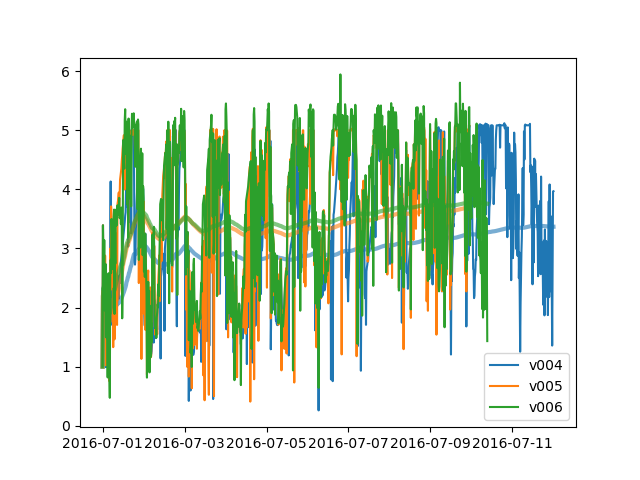

In [18]:
labels=utils.distinct_substrings(run_dirs)

plt.figure()

for ds,label in zip(his_dss,labels):
    l=plt.plot(ds.time,ds.timestep,label=label)
    # And running average:
    plt.plot(ds.time,np.cumsum(ds.timestep)/(1+np.arange(len(ds.time))),
             label='__nolabel__',color=l[0].get_color(),lw=3,alpha=0.6)
                                             
plt.legend()

In [12]:
np.diff(his_dss[0].time.values)/np.timedelta64(60,'s')

array([15., 15., 15., ..., 15., 15., 15.])

<IPython.core.display.Javascript object>


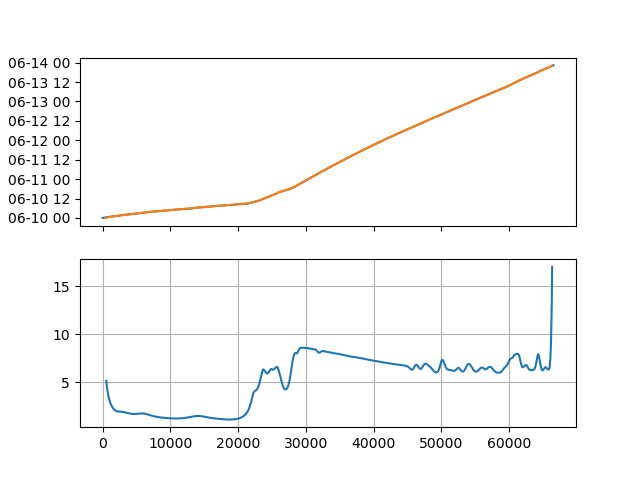

In [32]:
from stompy import filters
# I want to know if the slow overall speed of 5x realtime is because
# it was super slow at first, or because the whole run is slow.
# Make a synthetic wall clock time series

# assuming a constant time per timestep, plot roughly the simulation speedup

times=(his_ds.time.values - his_ds.time.values[0])/np.timedelta64(1_000_000,'us')
interval=np.diff(times) 

nsteps=np.r_[ 0, interval / his_ds.timestep.values[1:]]  
wall_time=np.cumsum(nsteps)

speedup=(times[-1]-times[0])/(wall_time[-1]-wall_time[0])
fac=speedup/5.11
wall_time*=fac

wall_time_s=filters.lowpass_fir(wall_time,winsize=30)

fig,axs=plt.subplots(2,1,sharex=True)
axs[0].plot(wall_time, his_ds.time)
axs[0].plot(wall_time_s, his_ds.time)

axs[1].plot(wall_time_s[1:], np.diff(his_ds.time)/np.timedelta64(1,'s')/np.diff(wall_time_s))

# I know the overall run so far has been 5.1x realtime.

In [29]:
fac

numpy.timedelta64(35523169,'ns')

In [23]:
wall_time

array([ 0., inf, inf, ..., inf, inf, inf])

In [16]:
his_ds

<xarray.Dataset>
Dimensions:                                  (cross_section: 10, gategens: 3, general_structures: 2, laydim: 28, laydimw: 29, nFlowElemContourPts: 4, nFlowElemWithBnd: 5705, nFlowLink: 8832, nFlowLinkPts: 2, nNetLink: 9154, nNetLinkPts: 2, station_geom_nNodes: 496, stations: 496, time: 1134)
Coordinates:
    station_x_coordinate                     (stations) float64 ...
    station_y_coordinate                     (stations) float64 ...
    station_name                             (stations) |S64 ...
    zcoordinate_c                            (time, stations, laydim) float64 ...
    zcoordinate_w                            (time, stations, laydimw) float64 ...
    zcoordinate_wu                           (time, stations, laydimw) float64 ...
    cross_section_name                       (cross_section) |S64 ...
    general_structure_id                     (general_structures) |S64 ...
    gategen_name                             (gategens) |S64 ...
  * time          